In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
data.drop("RID",axis=1, inplace = True) #RID는 그냥 Index라서 삭제

In [2]:
data

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


## 함수 만들기

In [3]:
pd.unique(data['age']).tolist()

['youth', 'middle_aged', 'senior']

In [4]:
pd.unique(data['class_buys_computer']).tolist()

['no', 'yes']

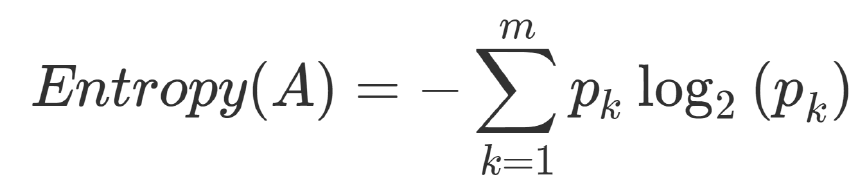

In [5]:
import math 
def getEntropy(df, feature) :

    entropy = 0
    
    # 열에서 unique 한 피처를 뽑아서 리스트로 만든담에
    for i in pd.unique(df[feature]).tolist():
        df2 = df[df[feature].apply(lambda x: x in i)]
    
        # len(df) 는 처음 데이터 개수
        # len(df2) 는 원하는 열에서 label이 참인 개수 
        p= len(df2)/len(df)
   
        entropy -=  p*(math.log(p,2))

    return(entropy)

In [6]:
getEntropy(data, "class_buys_computer")

0.9402859586706309

### 방법 1

In [7]:
def getGainA(df, feature , target ) : 
    
    entropy=0
    for i in pd.unique(df[feature]).tolist():
        # 원하는 속성을 골라냄
        df2 = df[df[feature].apply(lambda x: x in i)]
    
        # target 변수가 참인 개수
        label_p = len(df2[df2[target]=='yes'])
        
        # 전체 class 중에 선택된 클래스의 확률
        prob = len(df2)/len(df)
        
        # 뽑힌 class 에서 target 변수가 참인 확률 
        p = label_p/len(df2)
        
        try : 
            entropy -= prob* ((-p)*(math.log(p,2)) -(1-p)*(math.log((1-p),2)))
        except : 
            if p== 0:    # p==0 이면 계산이 log 0 이라 예외처리 해줌
                entropy -= prob * (-(1-p)*(math.log((1-p),2)))
            elif p==1 :  # p==1 이면 계산이 log 0 이라 예외처리 해줌
                entropy -= prob *( -p*(math.log(p,2)))
       
    print(-entropy)
    return(-entropy)


In [8]:
getGainA(data, "age","class_buys_computer")

0.6935361388961918


0.6935361388961918

In [9]:
    info_D = getEntropy(data,"class_buys_computer") 
    info_D_age = getGainA(data,'age', 'class_buys_computer')
    info_D_income = getGainA(data,'income', 'class_buys_computer')
    info_D_student = getGainA(data,'student', 'class_buys_computer')
    info_D_credit = getGainA(data,'credit_rating', 'class_buys_computer')

0.6935361388961918
0.9110633930116763
0.7884504573082896
0.8921589282623617


In [10]:
    gain_age = info_D - info_D_age
    gain_income = info_D - info_D_income
    gain_student = info_D - info_D_student
    gain_credit = info_D - info_D_credit

In [11]:
    gain_age, gain_income, gain_student, gain_credit

(0.2467498197744391,
 0.029222565658954647,
 0.15183550136234136,
 0.04812703040826927)

### 방법2
채우세요!
    데이터프레임 df에서 feature을 목표변수로 삼고 나머지 각 변수들의 Gain을 구하는 함수입니다.
    결과는 Key = 변수명, Value = Information Gain 으로 이루어진 Dictionary 여야 합니다.
    미리 주어진 3줄은 문제풀이에 도움을 주기 위해 주어졌으나, 무시하고 각자 원하는 방법으로 풀으셔도 전혀 무방합니다.

In [34]:
def getGainA2(df, feature):
    info_D = getEntropy(df, feature)  # 목표변수 feature 에 대한 info 를 구한다.
    col = list(df.loc[:,df.columns != feature])   # 목표변수를 제외한 나머지 설명변수를 리스트 형태로 저장
    
    gains=[]
    
    for i in col : 
        info_Di=0
        u = list(df[i].unique())    # 각 column 에 존재하는 값들을 받아서 list 형태로 만든다.
        
        for j in range(len(u)) : 
            new = df.loc[df[i]== u[j]]  # for문을 돌리면서 그 값을 가지는 행들만 뽑아낸다.
            
            # 전체 class 중에 선택된 클래스의 확률  *  각각의 엔트로피 
            info_Di += (len(new[i])/len(df[i])) * (getEntropy(new, feature)) # 엔트로피 함수를 사용해서 각각의 엔트로피를 구하고 확률에 곱한걸 더해서 info_Di 를 구함
  
        gains.append(info_D - info_Di)
        
    result = dict(zip(col,gains))  # 각 변수에 대한 information gain을 딕셔너리 형태로 저장.
    return result

In [35]:
getGainA2( data, "class_buys_computer")

{'age': 0.2467498197744391,
 'income': 0.029222565658954647,
 'student': 0.15183550136234136,
 'credit_rating': 0.04812703040826927}

In [33]:
my_dict = getGainA2(data,"class_buys_computer")
def f1(x):
    return my_dict[x]
key_max = max(my_dict.keys(),key=f1)
print('정보 획득이 가장 높은 변수는 ', key_max, "이며 정보 획득량은", my_dict[key_max],"이다.")

정보 획득이 가장 높은 변수는  age 이며 정보 획득량은 0.2467498197744391 이다.


## 결과 확인하기

'정보 획득이 가장 높은 변수는',age, "이며 정보 획득량은", 0.2467498197744391 "이다.